# Análisis Exploratorio de Datos: Datos Bancarios

In [1]:
#Hacemos los imports para cada paso
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import numpy as np
from numpy._core.defchararray import upper

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle
from sklearn.feature_selection import f_classif, SelectKBest


url = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"

# Leer el archivo CSV
df = pd.read_csv(url, sep=';') # Este archivo CSV contiene punto y coma como separadores
print(df.head())
print(df.columns)
df.head()

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Comprobamos las dimensiones del dataframe y, además de si los datos concuerdan con el número total, vemos el tipo de dato y podemos separar entre variables categóricas y numéricas

In [2]:
print(f"Dimensiones del dataframe: {df.shape}")
print(df.info())

Dimensiones del dataframe: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float

En caso de haber nulos se contabilizarian con sum(), pero como no es el caso comprobaremos solo los únicos

In [3]:
print(f"Valores unicos por columna: \n{df.nunique()}")

Valores unicos por columna: 
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


#### Resumen de cada columna:

age. Edad del cliente (numérico)  
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)  
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)  
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)  
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico) "aumento de coste de la vida"  
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico) "opinion situacioin fininanciera del pais"  
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)  
job. Tipo de trabajo (categórico)  
marital. Estado civil (categórico)  
education. Nivel de educación (categórico)  
default. ¿Tiene crédito actualmente? (categórico)  
housing. ¿Tiene un préstamo de vivienda? (categórico)  
loan. ¿Tiene un préstamo personal? (categórico)  
contact. Tipo de comunicación de contacto (categórico)  
month. Último mes en el que se le ha contactado (categórico)  
day_of_week. Último día en el que se le ha contactado (categórico)  
poutcome. Resultado de la campaña de marketing anterior (categórico)  
y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)  

duration. Duración del contacto previo en segundos (numérico)  
emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)  
nr.employed. Número de empleados. Indicador trimestral (numérico)  

### Eliminamos columnas que no nos aporten datos relevantes

In [4]:
print("No hay posibles datos duplicados que representen un problema en el analisis")

#Eliminamos datos irrelevantes
total_dataf = df.drop(['duration', 'emp.var.rate', 'nr.employed'], axis=1, inplace=False)
print(total_dataf.shape)
print(total_dataf.columns)
total_dataf.head()

No hay posibles datos duplicados que representen un problema en el analisis
(41188, 18)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no


## Análisis de variables univariante

### Generamos gráficos con los valores categóricos

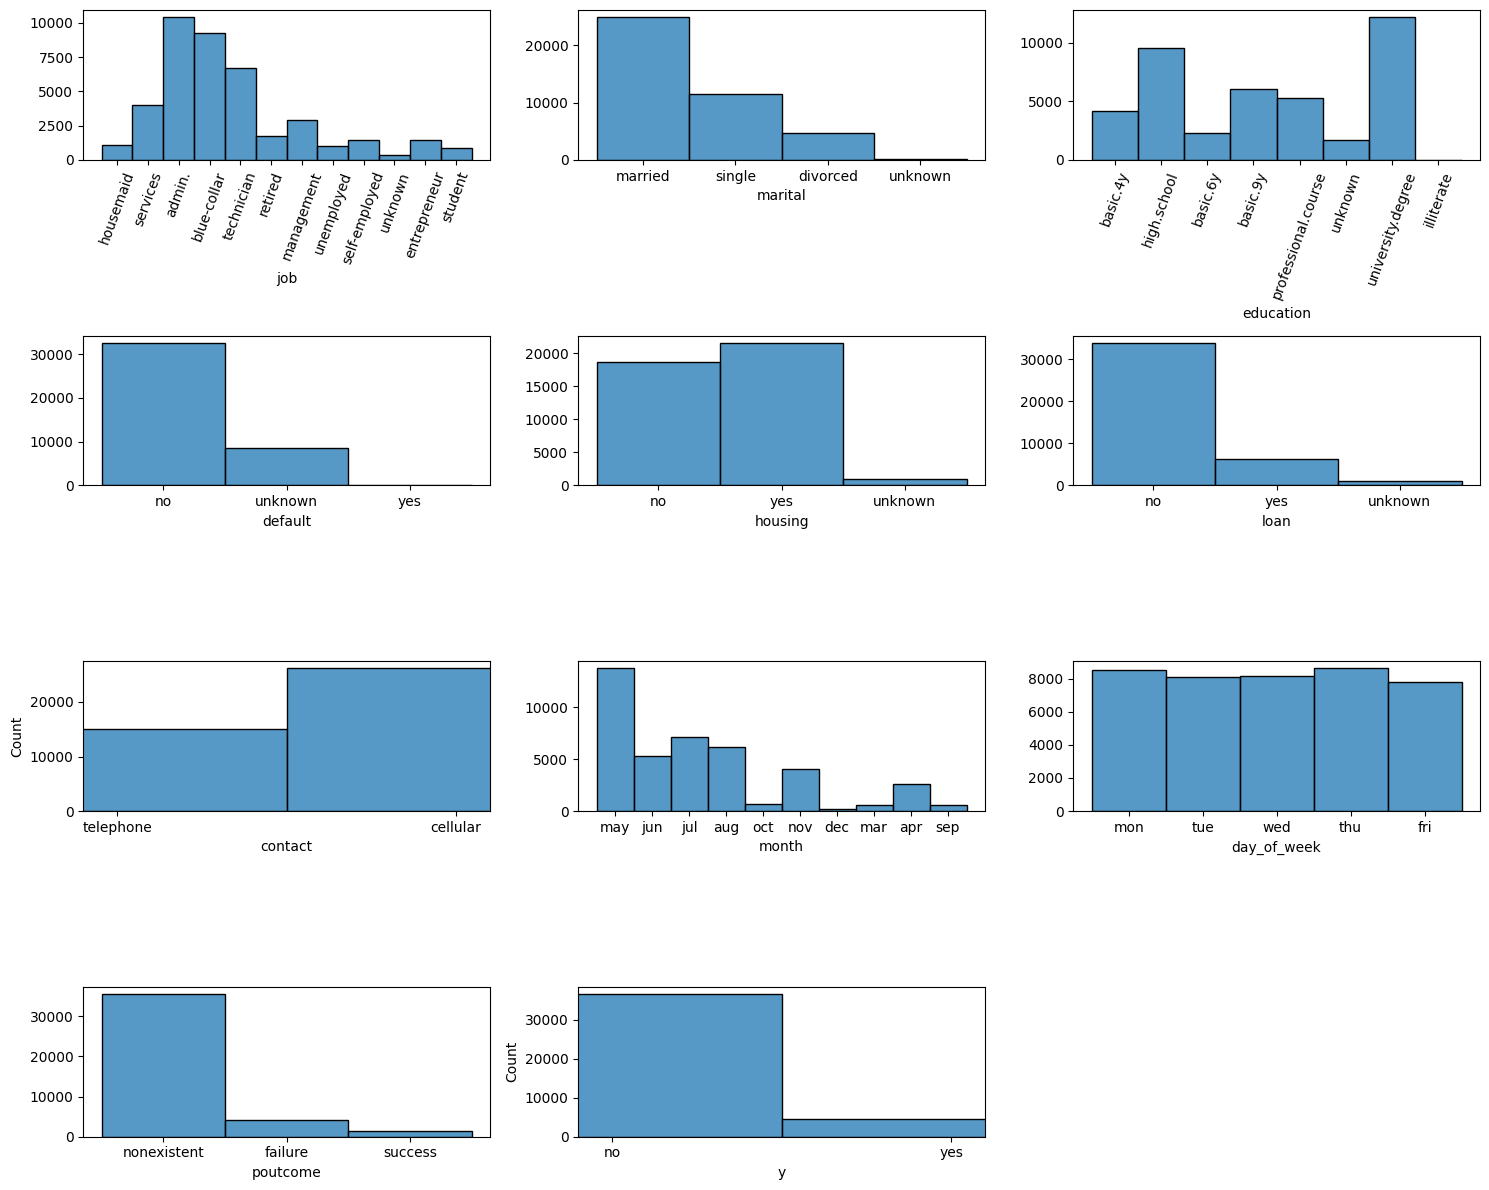

In [5]:
fig, axis = plt.subplots(4, 3, figsize = (15, 12))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = total_dataf, x = "job").set(ylabel = None)
axis[0,0].tick_params(axis="x", rotation=70)

sns.histplot(ax = axis[0, 1], data = total_dataf, x = "marital").set(ylabel = None)
plt.xticks(rotation=45)
sns.histplot(ax = axis[0, 2], data = total_dataf, x = "education").set(ylabel = None)
axis[0,2].tick_params(axis="x", rotation=70)

sns.histplot(ax = axis[1, 0], data = total_dataf, x = "default").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = total_dataf, x = "housing").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_dataf, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = total_dataf, x = "contact").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[2, 1], data = total_dataf, x = "month").set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = total_dataf, x = "day_of_week").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = total_dataf, x = "poutcome").set(ylabel = None)
sns.histplot(ax = axis[3, 1], data = total_dataf, x = "y").set_xlim(-0.1, 1.1)

fig.delaxes(axis[3, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Generamos gráficos con los valores numéricos

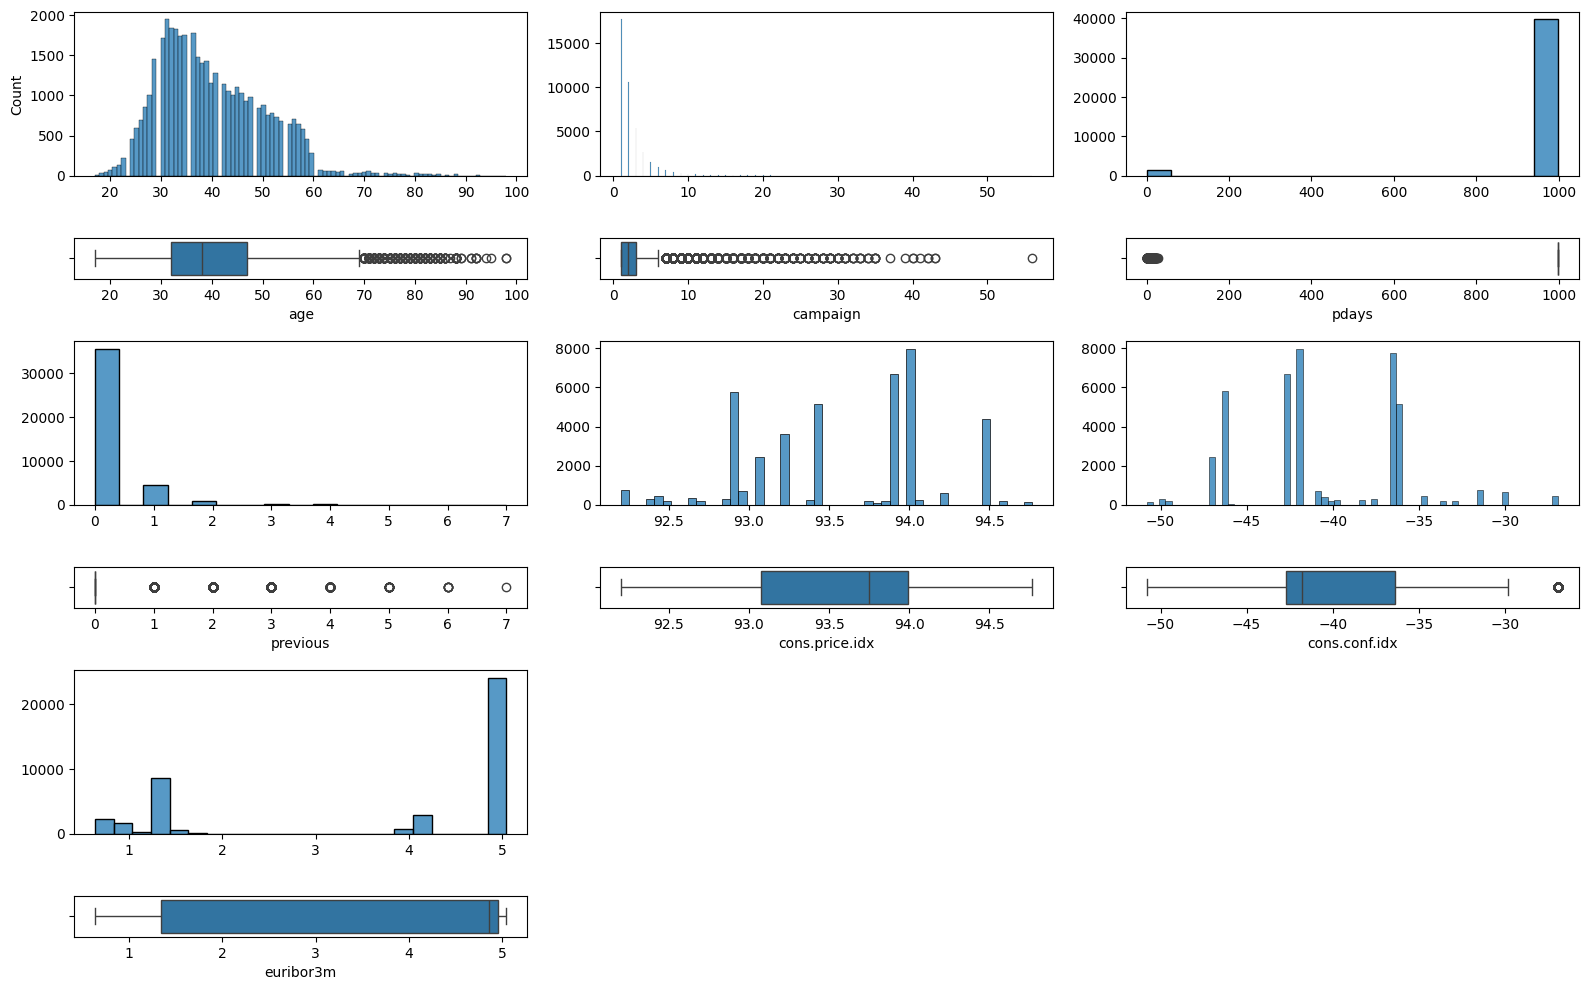

In [6]:
fig, axis = plt.subplots(6, 3, figsize = (16, 10), gridspec_kw={'height_ratios': [4, 1, 4, 1, 4, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_dataf, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_dataf, x = "age")

sns.histplot(ax = axis[0, 1], data = total_dataf, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_dataf, x = "campaign")

sns.histplot(ax = axis[0, 2], data = total_dataf, x = "pdays").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_dataf, x = "pdays")


sns.histplot(ax = axis[2, 0], data = total_dataf, x = "previous").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_dataf, x = "previous")

sns.histplot(ax = axis[2, 1], data = total_dataf, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_dataf, x = "cons.price.idx")

sns.histplot(ax = axis[2, 2], data = total_dataf, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_dataf, x = "cons.conf.idx")


sns.histplot(ax = axis[4, 0], data = total_dataf, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 0], data = total_dataf, x = "euribor3m")

fig.delaxes(axis[4, 1])
fig.delaxes(axis[5, 1])

fig.delaxes(axis[4, 2])
fig.delaxes(axis[5, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## Análisis de variables multivariante

### Análisis numérico-numérico

Tomaremos "y" como variable objetivo y será factorizada para poder relacionarla con las variable numéricas

### "y" - (age, campaign, pdays, previous, cons.price.idx, cons.conf.idx, euribor3m)

In [7]:
#En este caso, la variable objetivo se puede factorizar para realizar un analisis numerico como se demuestra a continuación
total_dataf["y_n"] = pd.factorize(total_dataf.y)[0]

y_transformation_rules = {row["y"]: row["y_n"] for index, row in total_dataf[["y_n", "y"]].drop_duplicates().iterrows()}

#Guardamos la regla de transformacion en data/processed
with open("../data/processed/y_transformation_rules.json", "w") as f:
  json.dump(y_transformation_rules, f)

total_dataf[["y","y_n"]].head()

,y,y_n
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


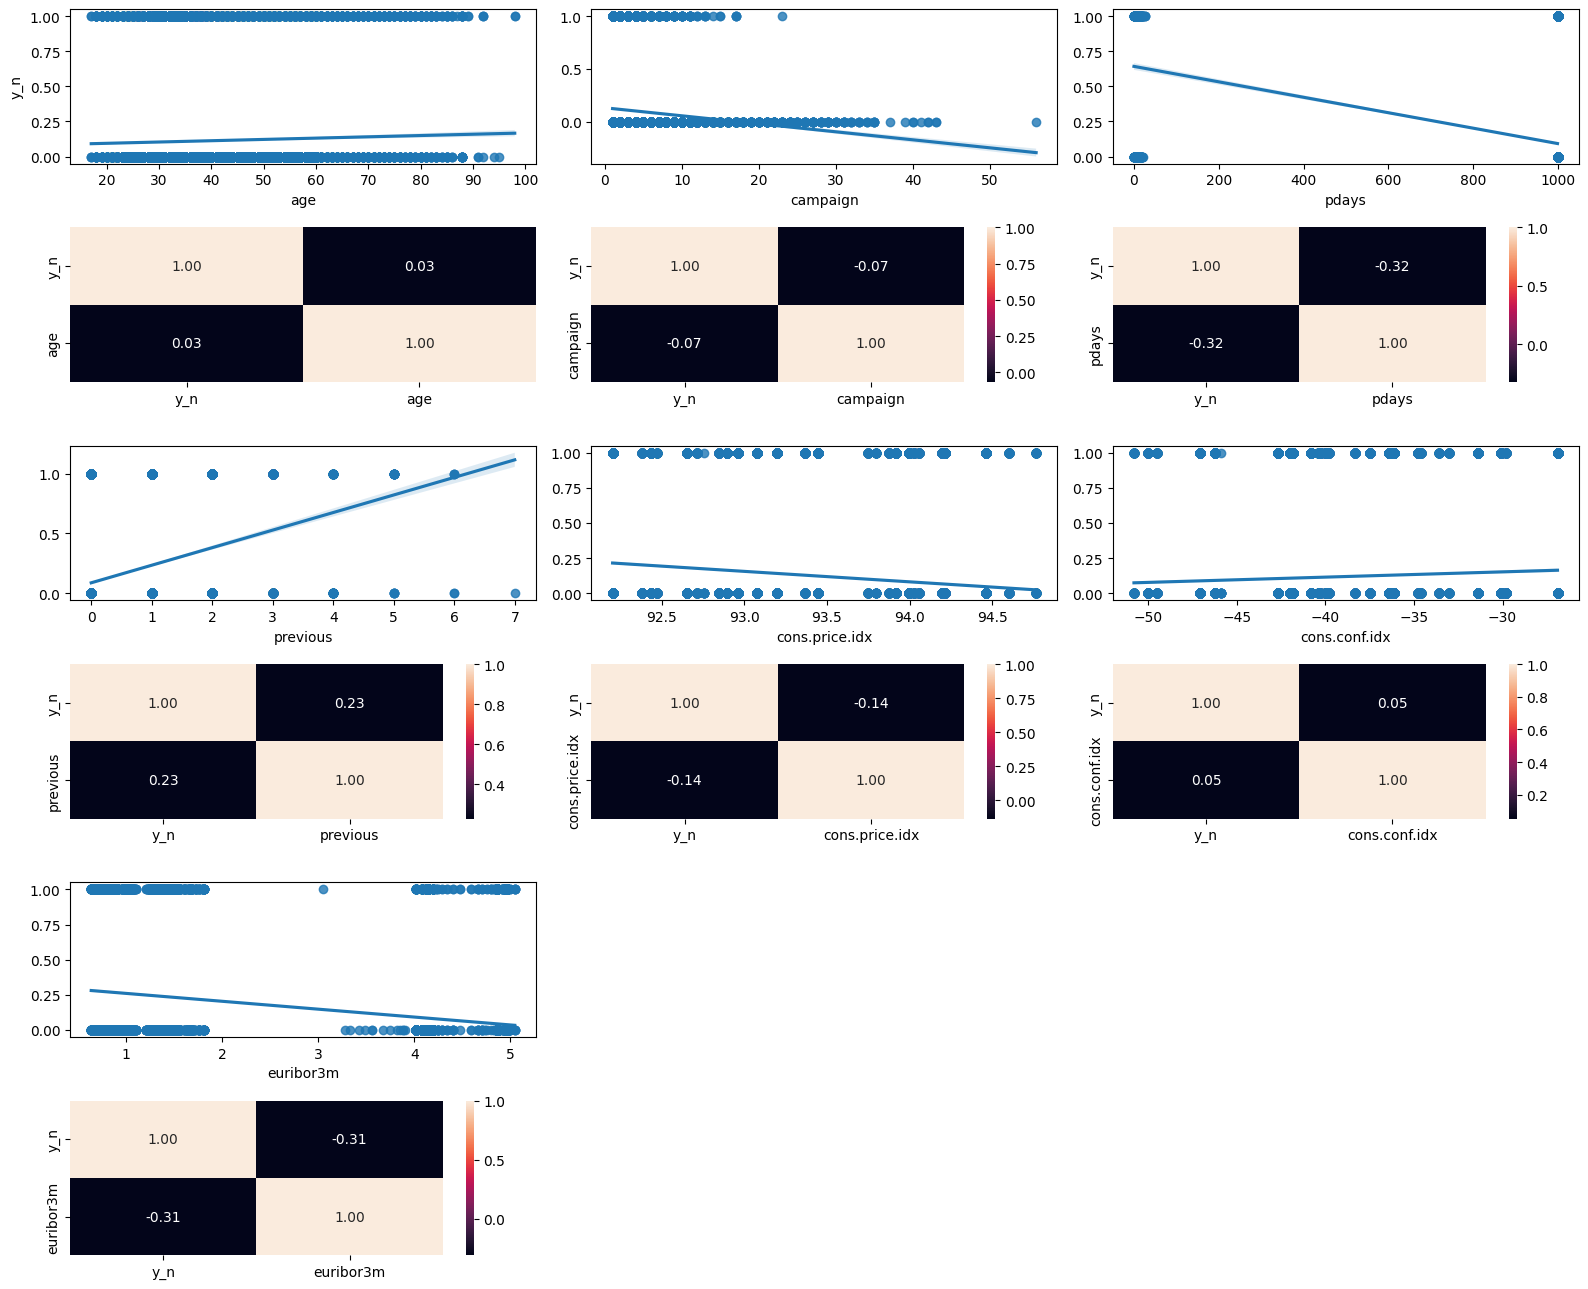

In [8]:
fig, axis = plt.subplots(6, 3, figsize = (16, 13))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "age", y = "y_n")
sns.heatmap(total_dataf[["y_n", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "campaign", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "pdays", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])



sns.regplot(ax = axis[2, 0], data = total_dataf, x = "previous", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = total_dataf, x = "cons.price.idx", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[2, 2], data = total_dataf, x = "cons.conf.idx", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2])



sns.regplot(ax = axis[4, 0], data = total_dataf, x = "euribor3m", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0])

fig.delaxes(axis[4, 1])
fig.delaxes(axis[5, 1])
fig.delaxes(axis[4, 2])
fig.delaxes(axis[5, 2])

# Ajustar el layout
plt.tight_layout()


# Mostrar el plot
plt.show()

### Combinaciones entre variables numéricas

Vamos a explorar la relación entre: age-campaign, age-previous, campaign-euribor3m

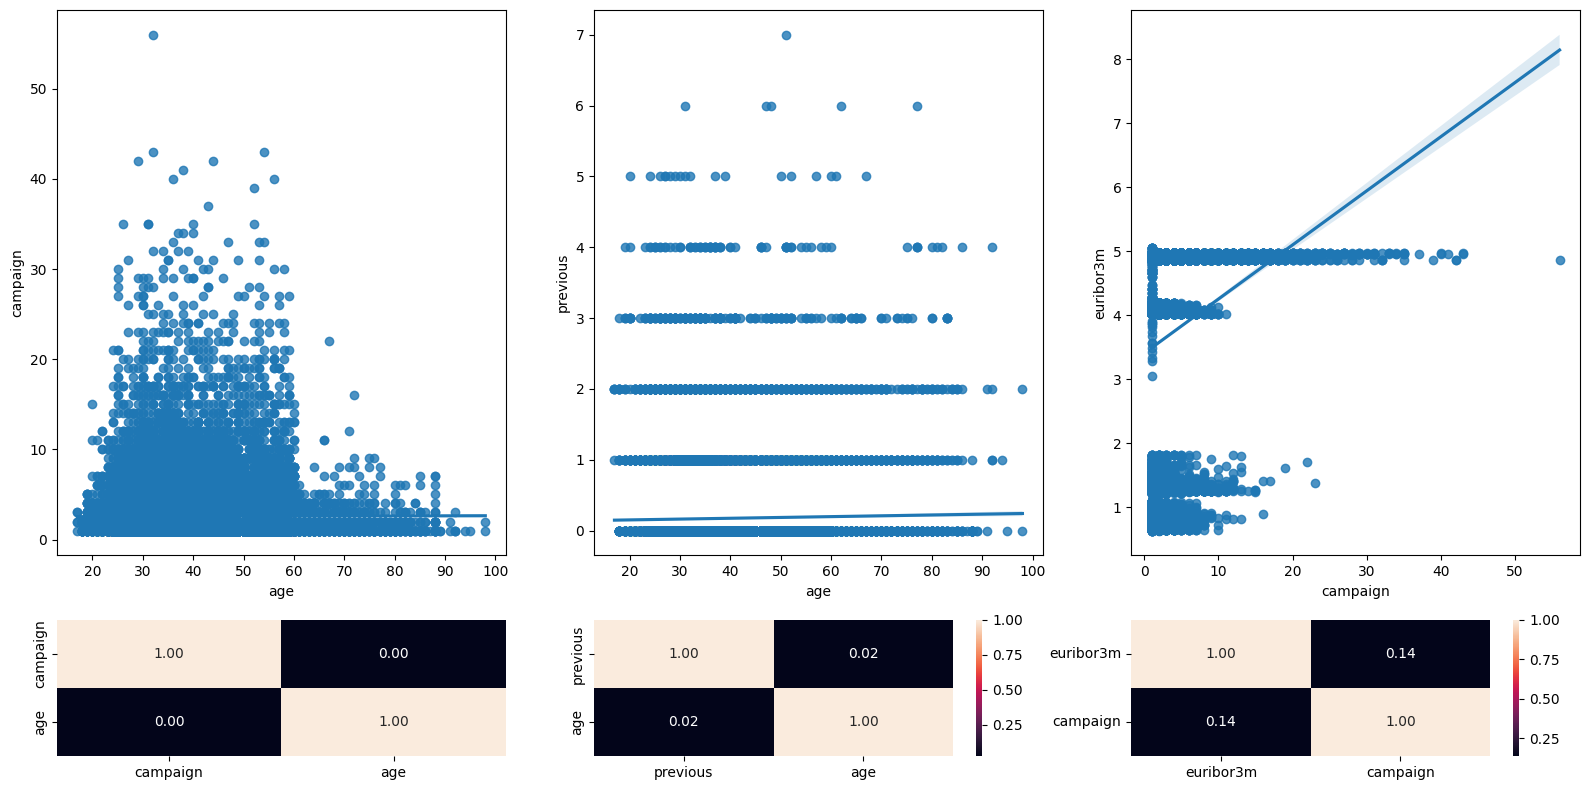

In [9]:
fig, axis = plt.subplots(2, 3, figsize = (16, 8), gridspec_kw={'height_ratios': [4, 1]})

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "age", y = "campaign")
sns.heatmap(total_dataf[["campaign", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "age", y = "previous")
sns.heatmap(total_dataf[["previous", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "campaign", y = "euribor3m")
sns.heatmap(total_dataf[["euribor3m", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])


plt.tight_layout()
plt.show()


### Combinaciones post-mapa de calor

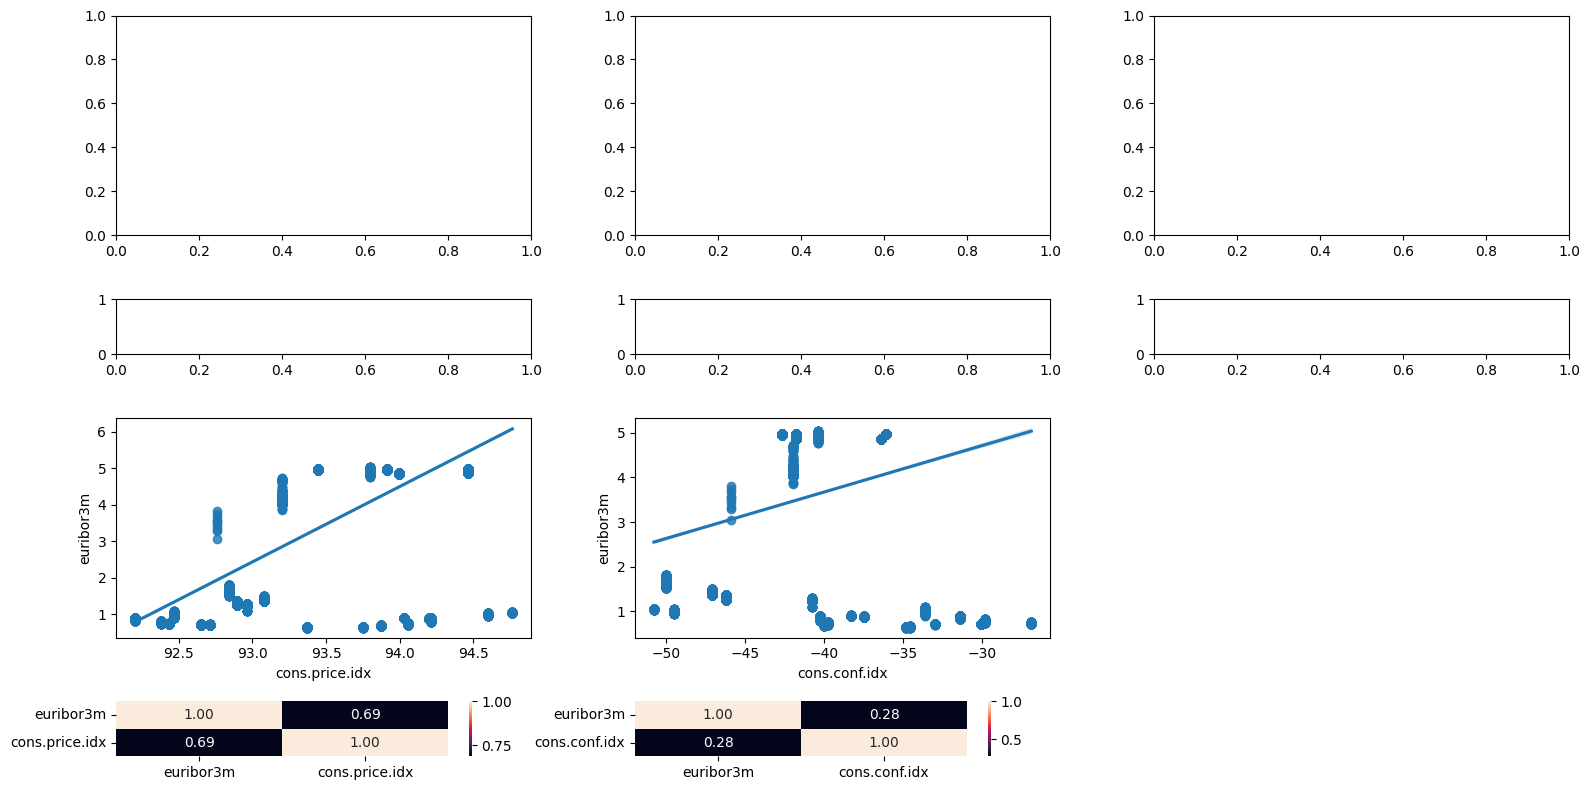

In [10]:
#pdays-euribor, pdays-previous, pdays-poutocme, previous-euribor, previos-contact, previous-poutcome, consprice con euribor y contact y month, conf con euribor, euriborn con uotcome, housing con loan,
#month con uribor, poutocme con contct y euribor,

fig, axis = plt.subplots(4, 3, figsize = (16, 8), gridspec_kw={'height_ratios': [4, 1, 4, 1]})

# Crear un diagrama de dispersión múltiple
'''sns.regplot(ax = axis[0, 0], data = total_dataf, x = "pdays", y = "euribor3m")
sns.heatmap(total_dataf[["euribor3m", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "pdays", y = "previous")
sns.heatmap(total_dataf[["previous", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "previous", y = "euribor3m")
sns.heatmap(total_dataf[["euribor3m", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])'''


sns.regplot(ax = axis[2, 0], data = total_dataf, x = "cons.price.idx", y = "euribor3m")
sns.heatmap(total_dataf[["euribor3m", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = total_dataf, x = "cons.conf.idx", y = "euribor3m")
sns.heatmap(total_dataf[["euribor3m", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

fig.delaxes(axis[2, 2])
fig.delaxes(axis[3, 2])


plt.tight_layout()
plt.show()

### Análisis categórico-categórico

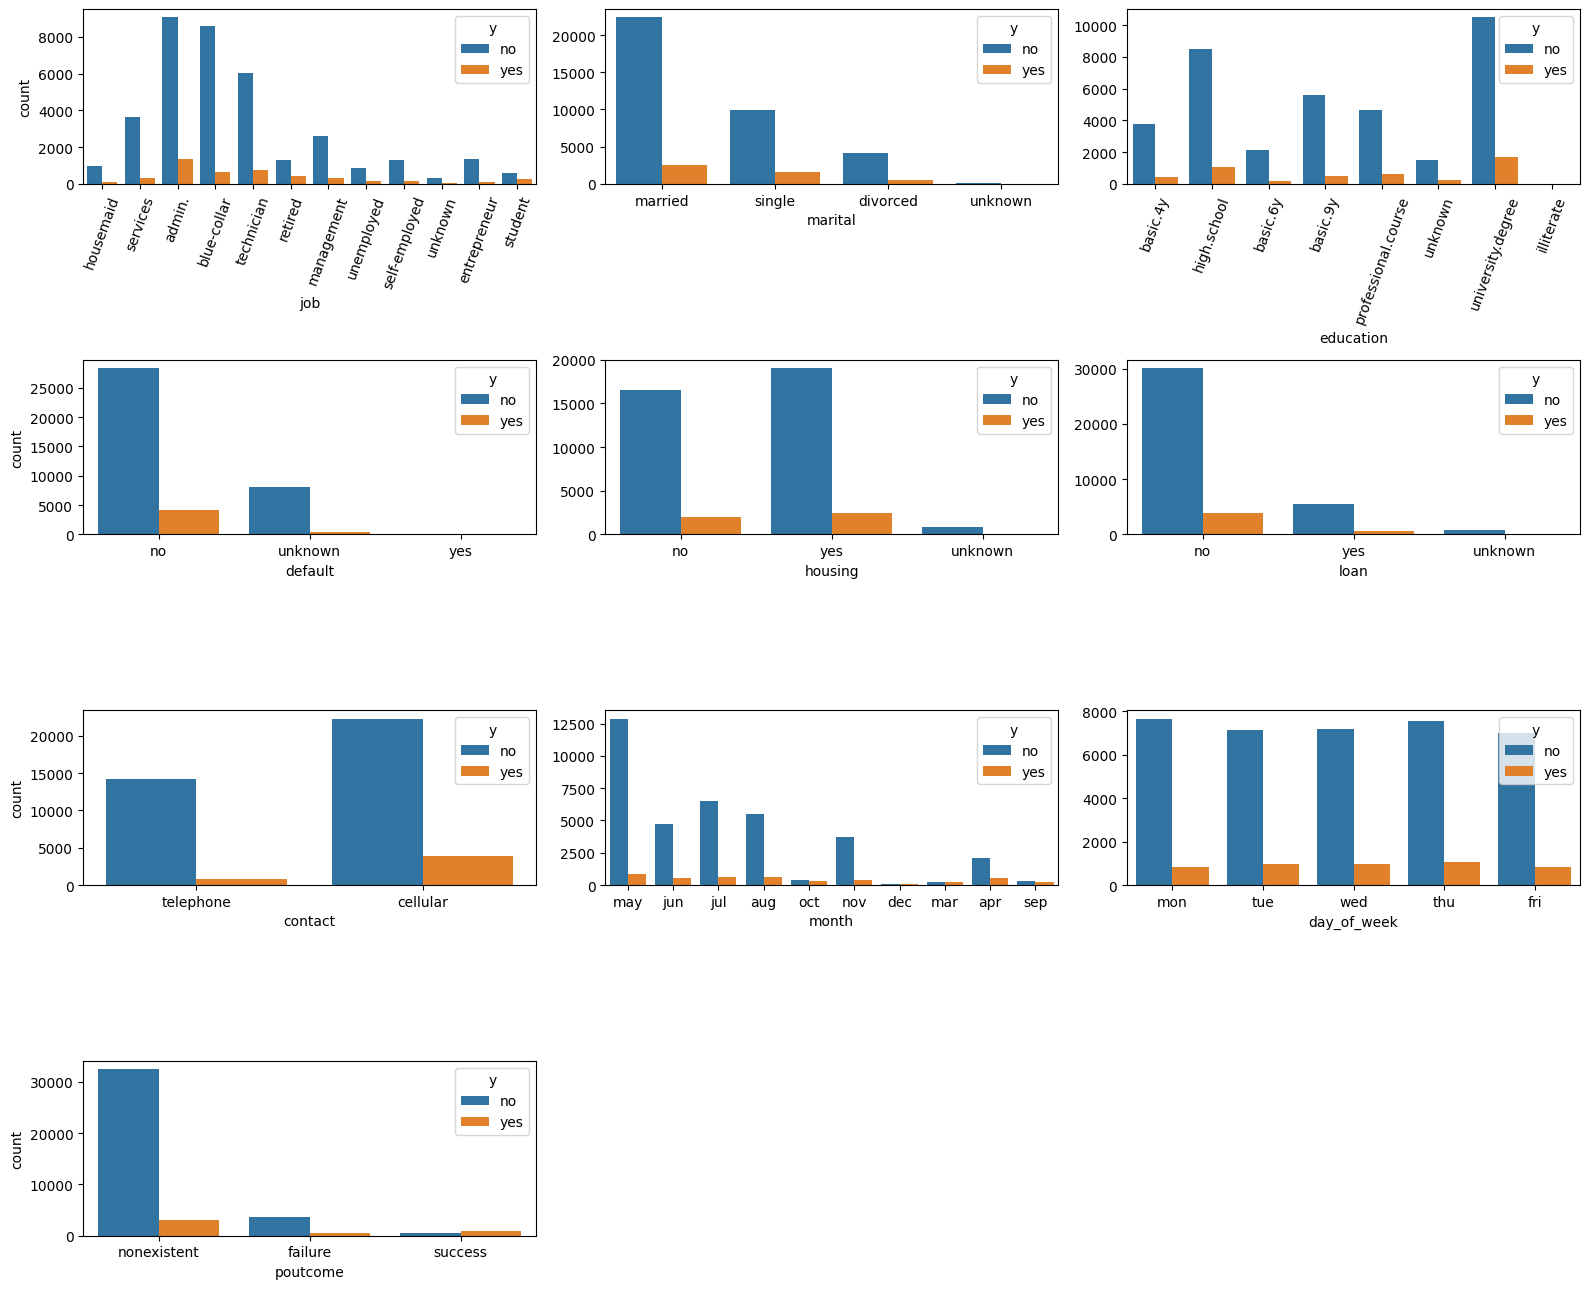

In [11]:
fig, axis = plt.subplots(4, 3, figsize = (16, 13))

# Crear un diagrama de dispersión múltiple
sns.countplot(ax = axis[0, 0], data = total_dataf, x = "job", hue = "y")
axis[0,0].tick_params(axis="x", rotation=70)
sns.countplot(ax = axis[0, 1], data = total_dataf, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_dataf, x = "education", hue = "y").set(ylabel = None)
axis[0,2].tick_params(axis="x", rotation=70)

sns.countplot(ax = axis[1, 0], data = total_dataf, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = total_dataf, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = total_dataf, x = "loan", hue = "y").set(ylabel = None)

sns.countplot(ax = axis[2, 0], data = total_dataf, x = "contact", hue = "y")
sns.countplot(ax = axis[2, 1], data = total_dataf, x = "month", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 2], data = total_dataf, x = "day_of_week", hue = "y").set(ylabel = None)

sns.countplot(ax = axis[3, 0], data = total_dataf, x = "poutcome", hue = "y")

fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Valores resaltables en variables categóricas

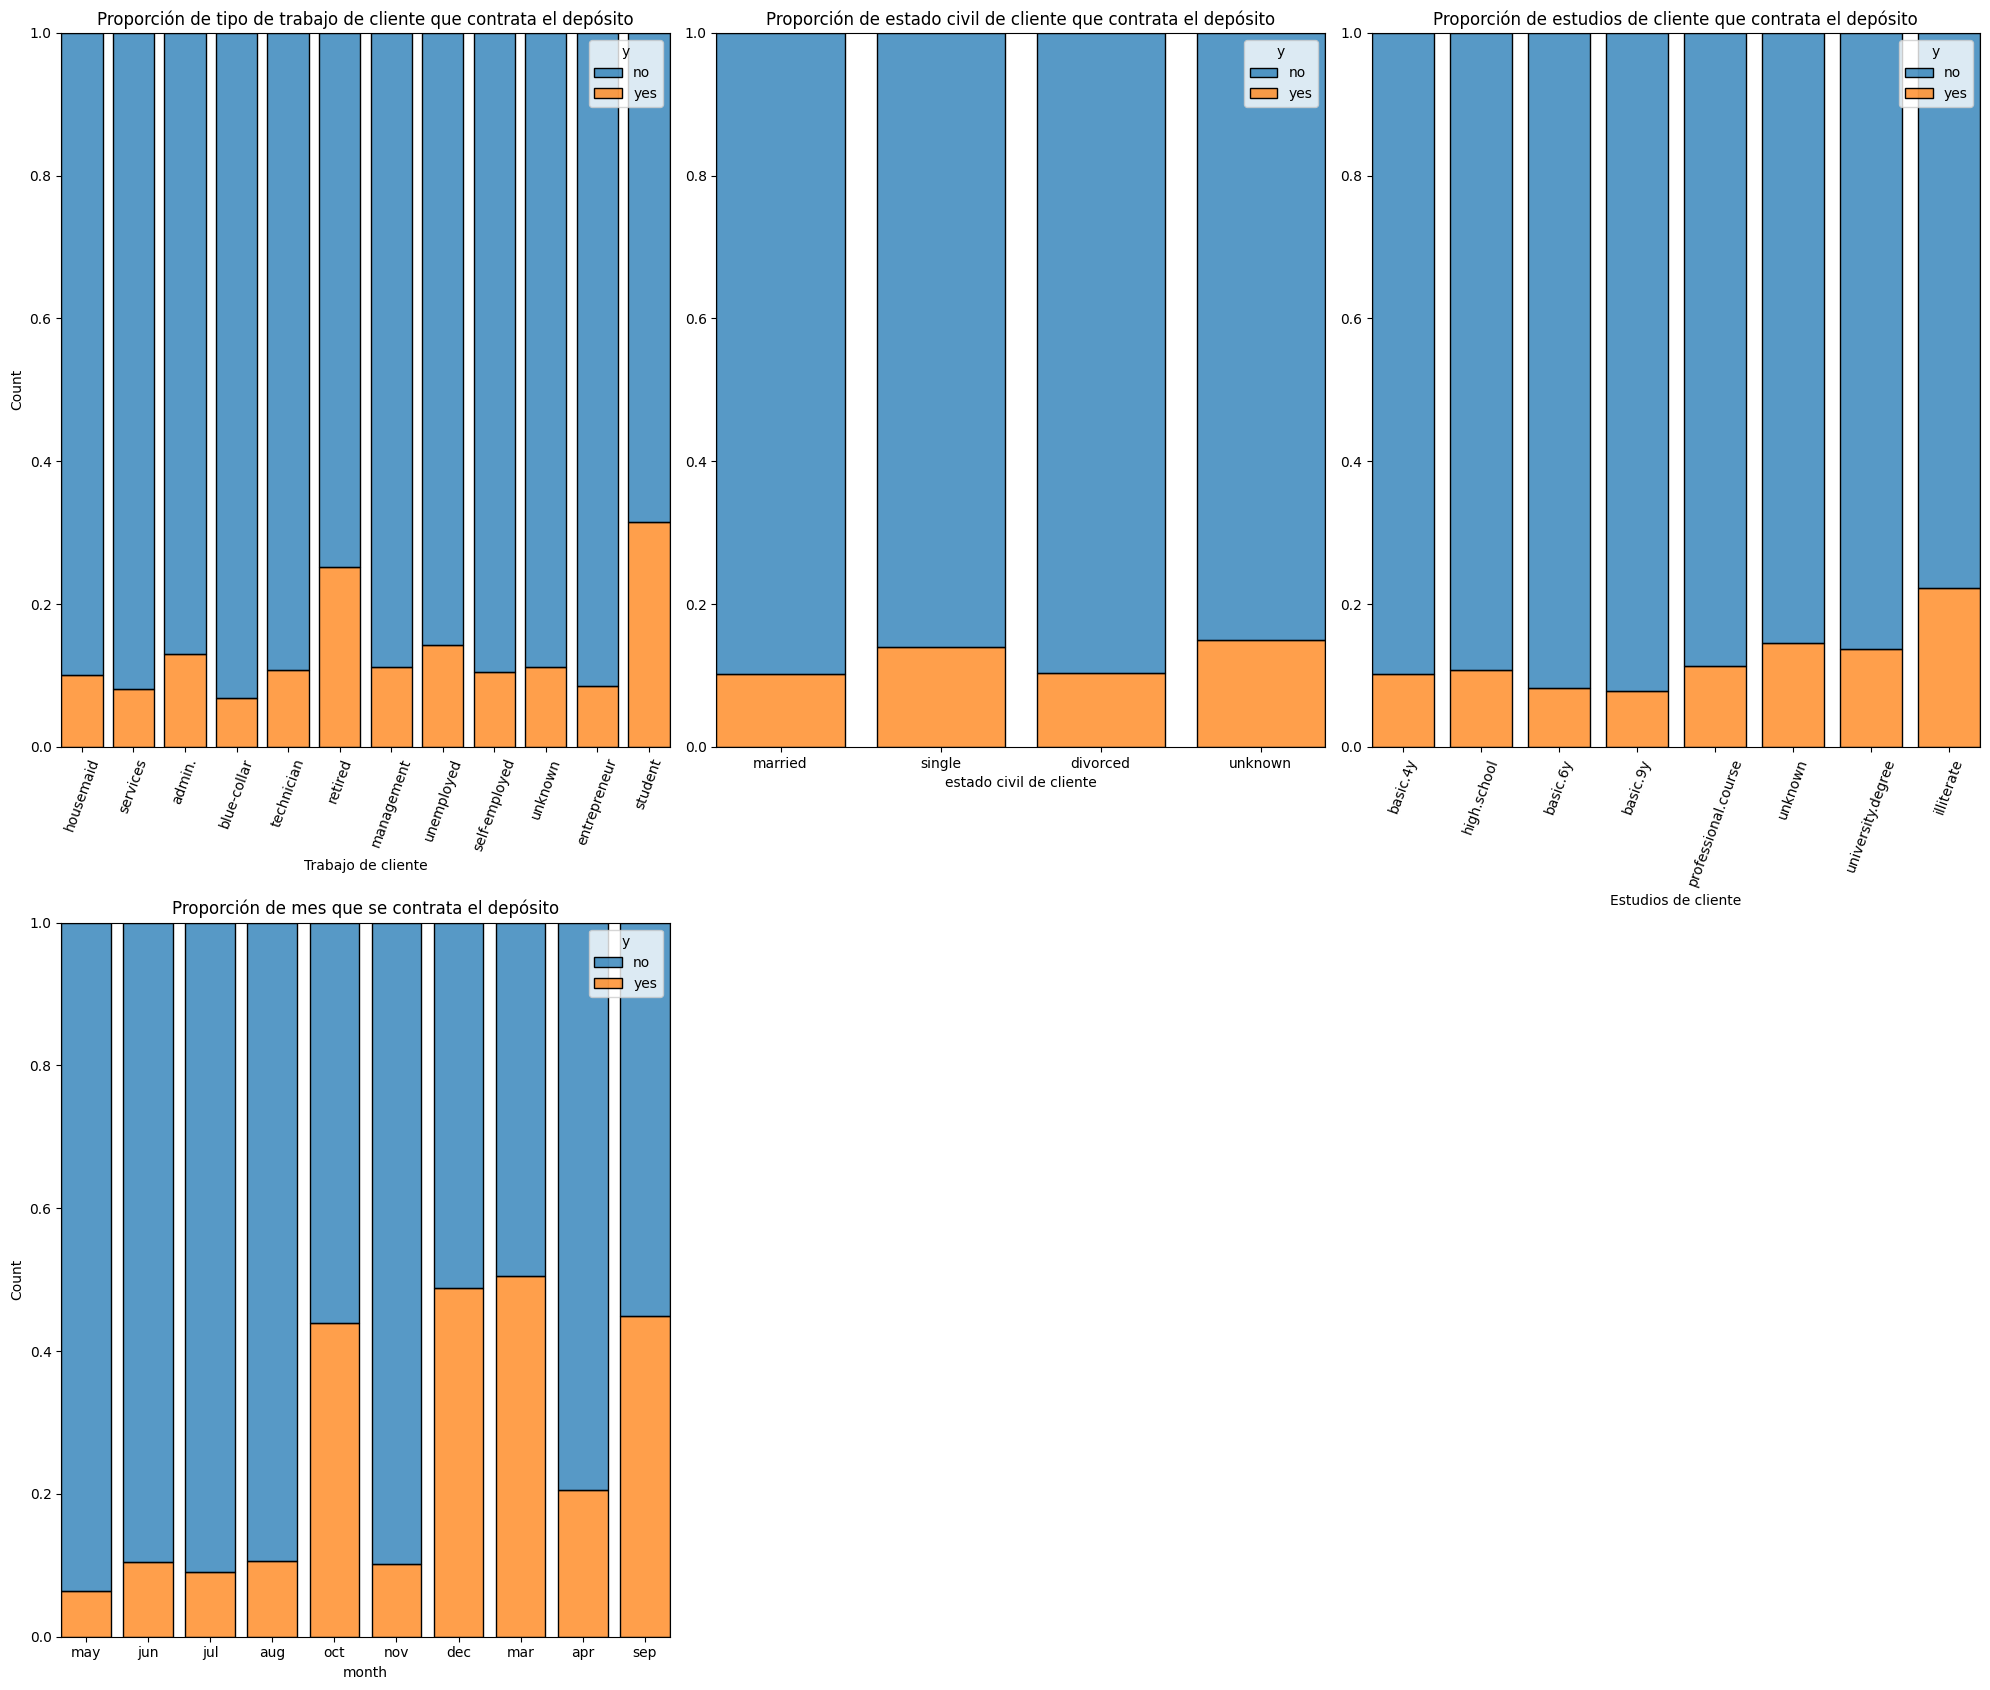

In [12]:
fig, axis = plt.subplots(2, 3, figsize = (20, 17))

#Los contactos realizados por movil 

# Crear un diagrama de dispersión múltiple
sns.histplot(ax = axis[0, 0], data = total_dataf, x = "job", hue = "y", multiple="fill", shrink=0.8).set(xlabel = "Trabajo de cliente", title="Proporción de tipo de trabajo de cliente que contrata el depósito")
axis[0,0].tick_params(axis="x", rotation=70)
sns.histplot(ax = axis[0, 1], data = total_dataf, x = "marital", hue = "y", multiple="fill", shrink=0.8).set(ylabel = None, xlabel = "estado civil de cliente", title="Proporción de estado civil de cliente que contrata el depósito")
sns.histplot(ax = axis[0, 2], data = total_dataf, x = "education", hue = "y", multiple="fill", shrink=0.8).set(ylabel = None, xlabel = "Estudios de cliente", title="Proporción de estudios de cliente que contrata el depósito")
axis[0,2].tick_params(axis="x", rotation=70)


sns.histplot(ax = axis[1, 0], data = total_dataf, x = "month", hue = "y", multiple="fill", shrink=0.8).set(title="Proporción de mes que se contrata el depósito")

fig.delaxes(axis[1, 1])
fig.delaxes(axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Combinaciones de la clase con varias predictoras

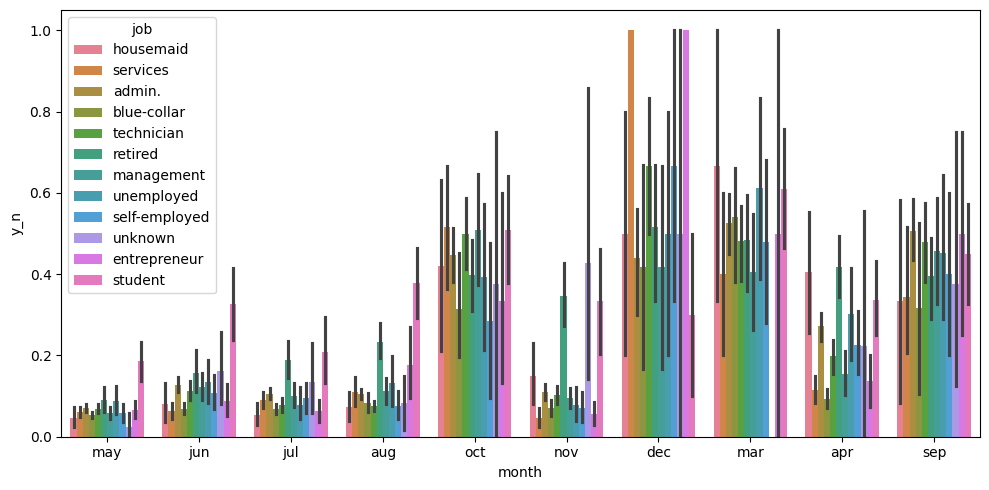

In [13]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)

sns.barplot(data = total_dataf, x = "month", y = "y_n", hue = "job")

plt.tight_layout()

plt.show()

## Análisis de correlaciones (completo)

### Factorizar las variables categóricas

In [14]:

lista_a_factorizar = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

for var in lista_a_factorizar:
  url_transformado = "../data/processed/" + var + "_transformation_rules.json"
  var_n = var+"_n"

  total_dataf[var_n] = pd.factorize(total_dataf[var])[0]
  total_dataf[[var_n, var]]

  transformation_rules = {row[var]: row[var_n] for index, row in total_dataf[[var_n, var]].drop_duplicates().iterrows()}

  with open(url_transformado, "w") as f:
    json.dump(transformation_rules, f)

#### Mapa de calor

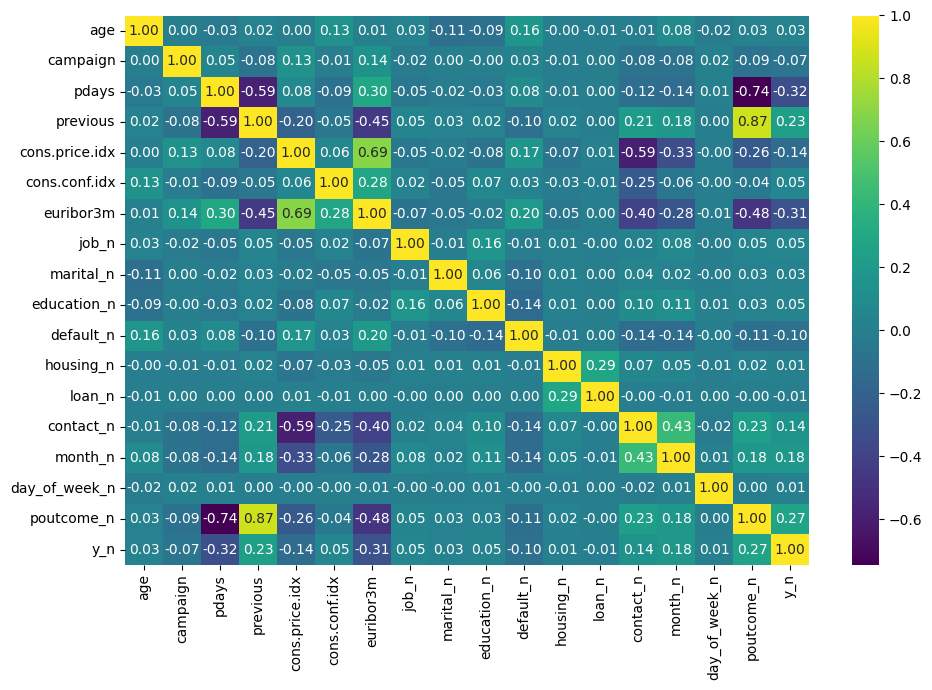

In [15]:
cols_num = ["age", "campaign", "pdays", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m", "job_n", "marital_n", "education_n", 
            "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n", "y_n"]  # todas numéricas
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(total_dataf[cols_num].corr(method="pearson"), annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.tight_layout()
plt.show()



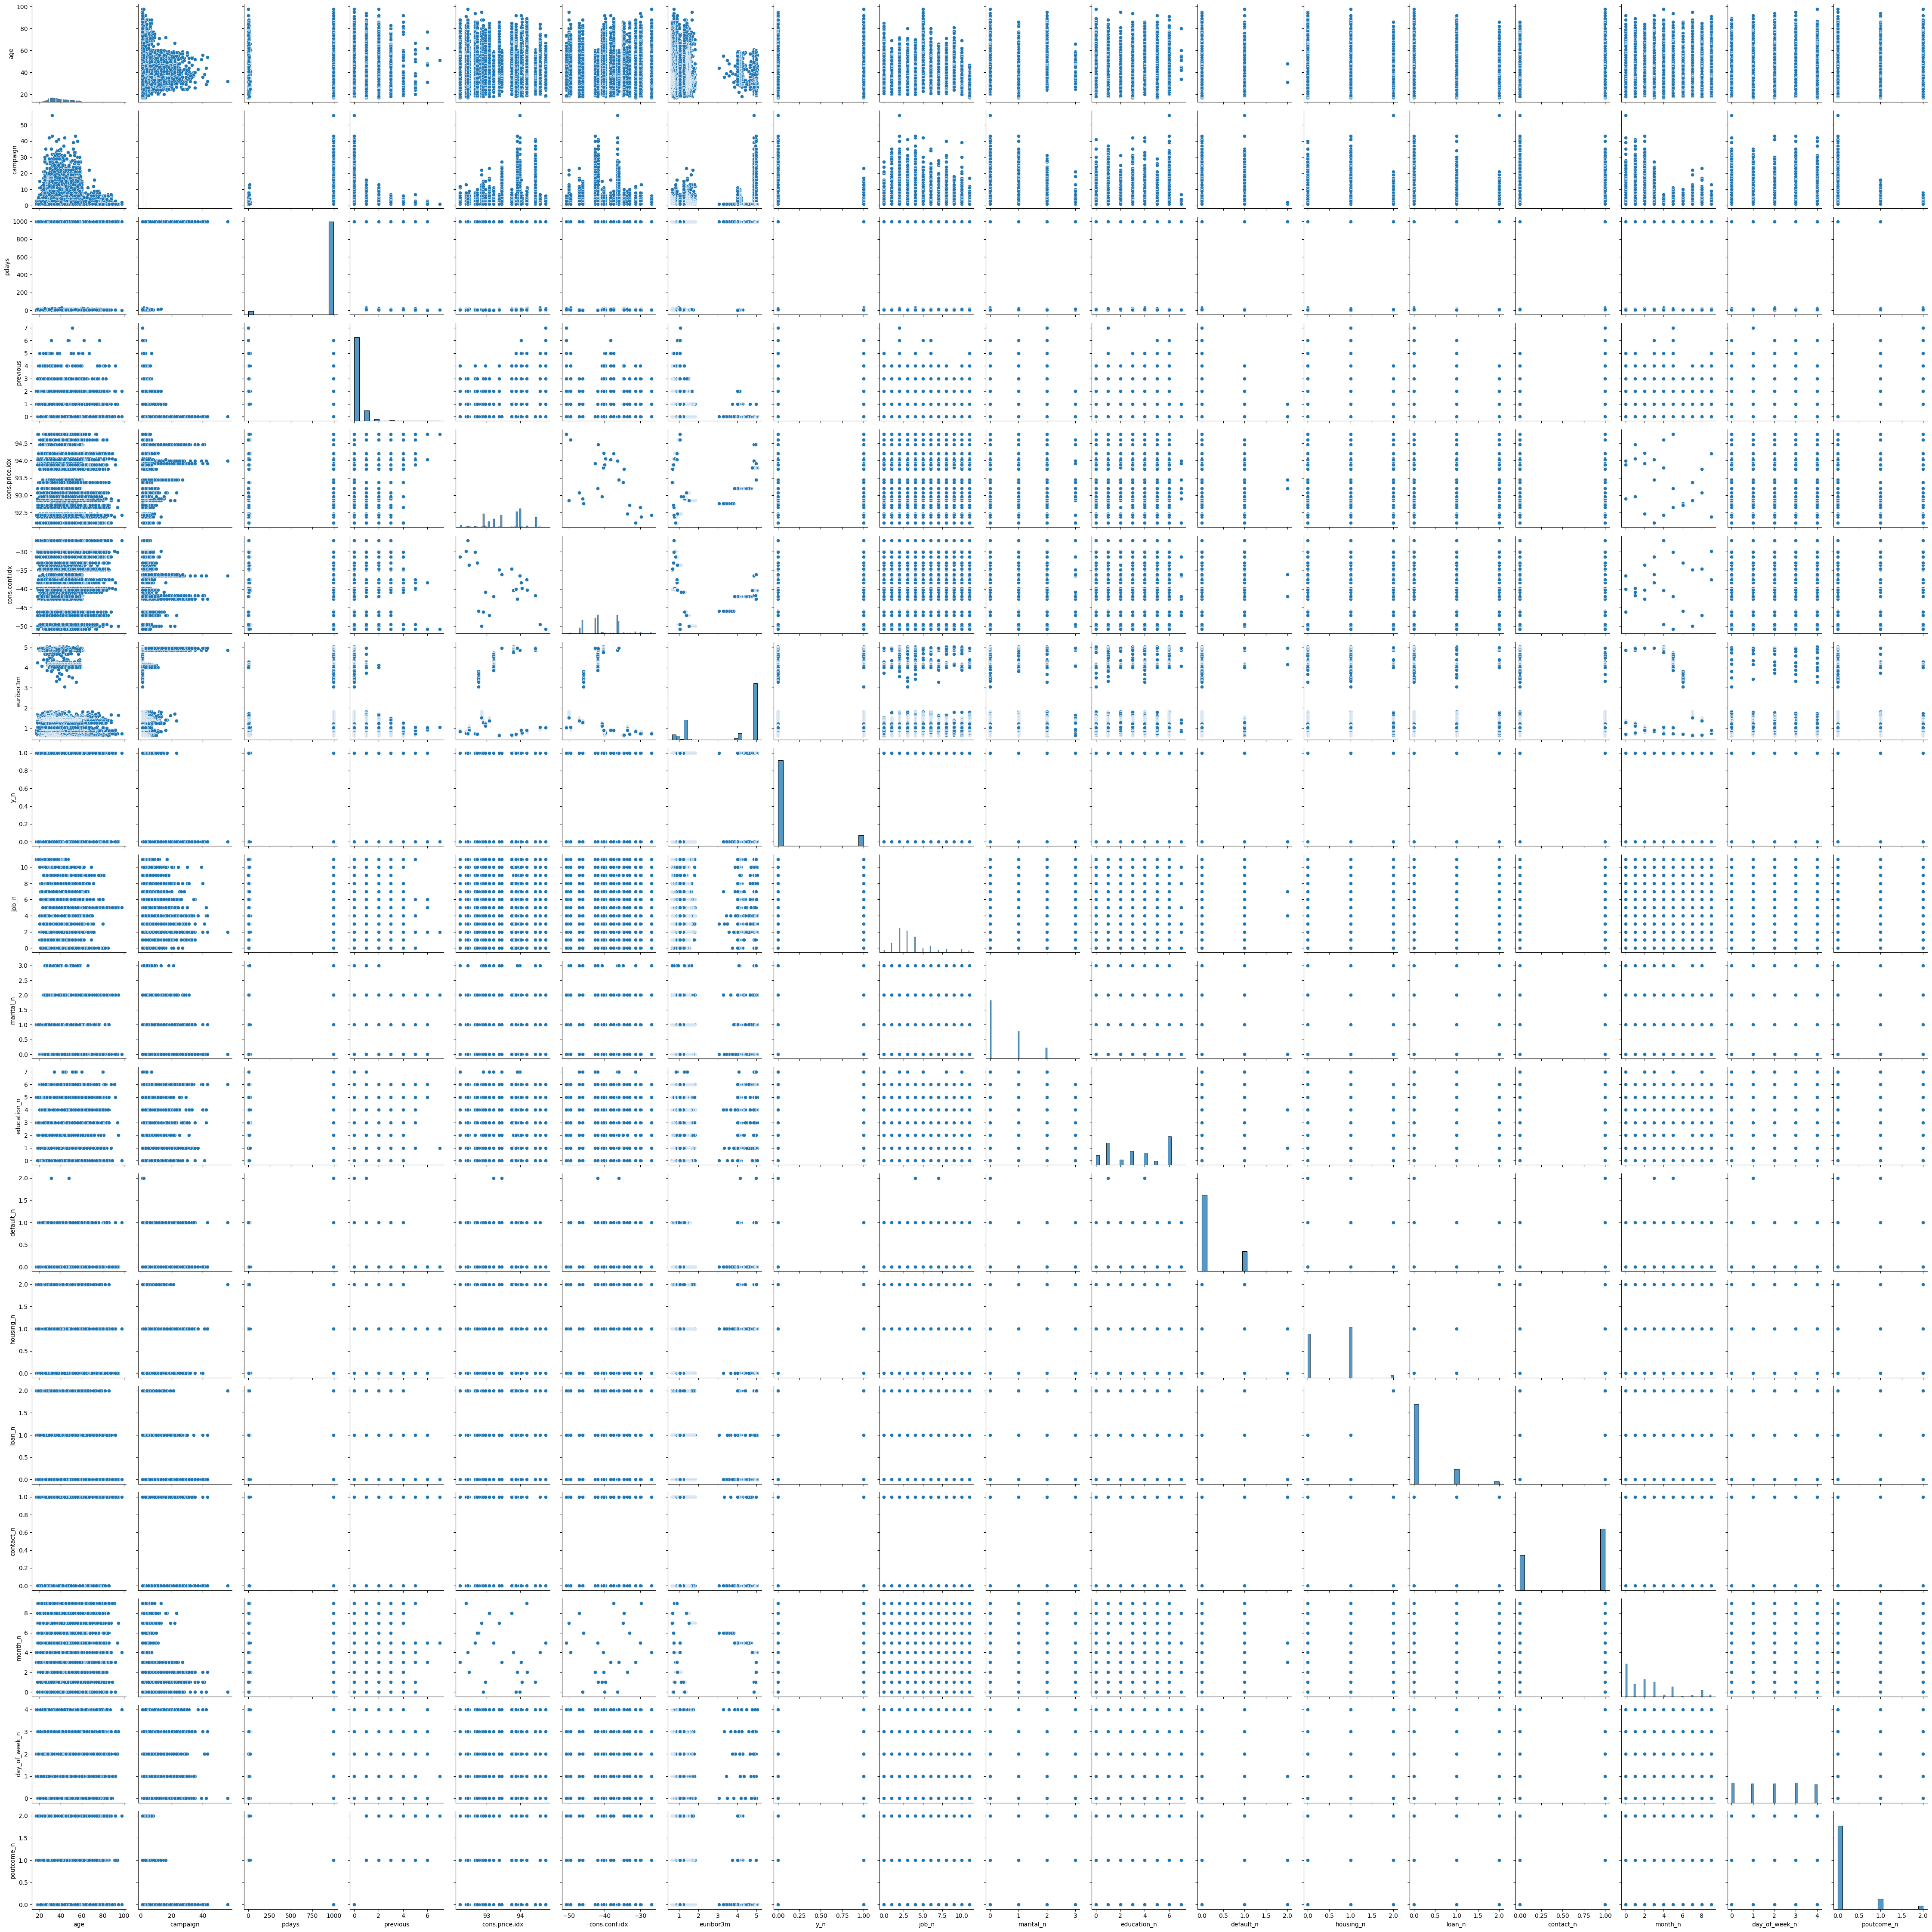

In [16]:
sns.pairplot(data = total_dataf)
plt.tight_layout()
plt.show()

## Ingeniería de características

### Análisis de outliers

In [17]:
FINAL_COLS = ["age", "campaign", "pdays", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m", "job_n", "marital_n", "education_n", "default_n", 
              "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n", "y_n"]
total_dataf = total_dataf[FINAL_COLS]
total_dataf.describe()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,93.575664,-40.502600,3.621291,3.673691,0.510634,3.277532,0.208872,0.571914,0.199767,0.634748,2.250097,1.979581,0.169904,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.578840,4.628198,1.734447,2.454116,0.696779,2.185525,0.406686,0.541209,0.456002,0.481507,2.429079,1.411514,0.455754,0.316173
min,17.00000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.634000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,93.075000,-42.700000,1.344000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,93.749000,-41.800000,4.857000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,93.994000,-36.400000,4.961000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,94.767000,-26.900000,5.045000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


In [18]:
# TENEMOS QUE GUARDARNOS TODOS LOS DATASETS, ES DECIR:

total_data_CON_outliers = total_dataf.copy()
total_data_SIN_outliers = total_dataf.copy() # Lo vamos a modificar. Para cada variable con outliers, reemplazamos sus valores outliers

outliers_cols = ["age", "campaign", "pdays", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m"]

def replace_outliers(column, df):
  col_stats = total_dataf[column].describe()
  col_iqr = col_stats["75%"] - col_stats["25%"]
  upper_limit = round(float(col_stats["75%"] + 1.5 * col_iqr), 2)
  lower_limit = round(float(col_stats["25%"] - 1.5 * col_iqr), 2)

  if lower_limit < 0: lower_limit = min(df[column])
  # Vamos a quitar los outliers superiores
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Vamos a quitar los outliers inferiores
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in outliers_cols:
  total_data_SIN_outliers, limits = replace_outliers(column, total_data_SIN_outliers)
  outliers_dict.update({column: limits})

with open("../data/processed/outliers_dict.json", "w") as f:
  json.dump(outliers_dict, f)

### Análisis de valores faltantes

En este apartado analizariamos si tiene nulos en algun lugar y los reemplazariamos con la media, mediana o moda, pero al no tener nulos continuamos con el resto de análisis

### Inferencia de nuevas características

Al analizar los elementos del dataset, se concluyó que no sería ideal fusionar valores ya que podría perder precisión el modelo.

### Escalado de valores

In [19]:
predictoras = ["age", "campaign", "pdays", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m", "job_n", "marital_n", "education_n", "default_n", 
              "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n"]
target = "y_n"

X_CON = total_data_CON_outliers.drop(target, axis = 1)[predictoras]
X_SIN = total_data_SIN_outliers.drop(target, axis = 1)[predictoras]
y = total_data_CON_outliers[target]

X_train_CON_outliers, X_test_CON_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 10)
X_train_SIN_outliers, X_test_SIN_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 10)

In [20]:
# X_train_CON_outliers
# X_train_SIN_outliers

# X_test_CON_outliers
# X_test_SIN_outliers

# TENGO QUE GUARDARME TRES SITUACIONES: 1) DATASET SIN TOCAR, 2) DATASET NORMALIZADO, 3) DATASET MIN-MAX

## NORMALIZACIÓN
### CON OUTLIERS
norm_CON_outliers = StandardScaler()

norm_CON_outliers.fit(X_train_CON_outliers)

X_train_CON_outliers_norm = norm_CON_outliers.transform(X_train_CON_outliers)
X_train_CON_outliers_norm = pd.DataFrame(X_train_CON_outliers_norm, index = X_train_CON_outliers.index, columns = predictoras)

X_test_CON_outliers_norm = norm_CON_outliers.transform(X_test_CON_outliers)
X_test_CON_outliers_norm = pd.DataFrame(X_test_CON_outliers_norm, index = X_test_CON_outliers.index, columns = predictoras)

### SIN OUTLIERS
norm_SIN_outliers = StandardScaler()
norm_SIN_outliers.fit(X_train_SIN_outliers)

X_train_SIN_outliers_norm = norm_SIN_outliers.transform(X_train_SIN_outliers)
X_train_SIN_outliers_norm = pd.DataFrame(X_train_SIN_outliers_norm, index = X_train_SIN_outliers.index, columns = predictoras)

X_test_SIN_outliers_norm = norm_SIN_outliers.transform(X_test_SIN_outliers)
X_test_SIN_outliers_norm = pd.DataFrame(X_test_SIN_outliers_norm, index = X_test_SIN_outliers.index, columns = predictoras)


## ESCALADO MIN-MAX (MINMAXIMIZACIÓN)
### CON OUTLIERS
scaler_CON_outliers = MinMaxScaler()
scaler_CON_outliers.fit(X_train_CON_outliers)

X_train_CON_outliers_scal = scaler_CON_outliers.transform(X_train_CON_outliers)
X_train_CON_outliers_scal = pd.DataFrame(X_train_CON_outliers_scal, index = X_train_CON_outliers.index, columns = predictoras)

X_test_CON_outliers_scal = scaler_CON_outliers.transform(X_test_CON_outliers)
X_test_CON_outliers_scal = pd.DataFrame(X_test_CON_outliers_scal, index = X_test_CON_outliers.index, columns = predictoras)

### SIN OUTLIERS
scaler_SIN_outliers = MinMaxScaler()
scaler_SIN_outliers.fit(X_train_SIN_outliers)

X_train_SIN_outliers_scal = scaler_SIN_outliers.transform(X_train_SIN_outliers)
X_train_SIN_outliers_scal = pd.DataFrame(X_train_SIN_outliers_scal, index = X_train_SIN_outliers.index, columns = predictoras)

X_test_SIN_outliers_scal = scaler_SIN_outliers.transform(X_test_SIN_outliers)
X_test_SIN_outliers_scal = pd.DataFrame(X_test_SIN_outliers_scal, index = X_test_SIN_outliers.index, columns = predictoras)


# GUARDADO DE LOS DATASETS RESULTANTES
X_train_CON_outliers.to_excel("../data/processed/X_train_CON_outliers.xlsx", index = False)
X_train_CON_outliers_norm.to_excel("../data/processed/X_train_CON_outliers_norm.xlsx", index = False)
X_train_CON_outliers_scal.to_excel("../data/processed/X_train_CON_outliers_scal.xlsx", index = False)
X_train_SIN_outliers.to_excel("../data/processed/X_train_SIN_outliers.xlsx", index = False)
X_train_SIN_outliers_norm.to_excel("../data/processed/X_train_SIN_outliers_norm.xlsx", index = False)
X_train_SIN_outliers_scal.to_excel("../data/processed/X_train_SIN_outliers_scal.xlsx", index = False)

X_test_CON_outliers.to_excel("../data/processed/X_test_CON_outliers.xlsx", index = False)
X_test_CON_outliers_norm.to_excel("../data/processed/X_test_CON_outliers_norm.xlsx", index = False)
X_test_CON_outliers_scal.to_excel("../data/processed/X_test_CON_outliers_scal.xlsx", index = False)
X_test_SIN_outliers.to_excel("../data/processed/X_test_SIN_outliers.xlsx", index = False)
X_test_SIN_outliers_norm.to_excel("../data/processed/X_test_SIN_outliers_norm.xlsx", index = False)
X_test_SIN_outliers_scal.to_excel("../data/processed/X_test_SIN_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

# SCALERS

with open("../models/norm_CON_outliers.pkl", "wb") as file:
  pickle.dump(norm_CON_outliers, file)
with open("../models/norm_SIN_outliers.pkl", "wb") as file:
  pickle.dump(norm_SIN_outliers, file)
with open("../models/scaler_CON_outliers.pkl", "wb") as file:
  pickle.dump(scaler_CON_outliers, file)
with open("../models/scaler_SIN_outliers.pkl", "wb") as file:
  pickle.dump(scaler_SIN_outliers, file)

## Feature Selection

In [21]:
X_train = X_train_CON_outliers.copy()
X_test = X_test_CON_outliers.copy()

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,pdays,previous,euribor3m,month_n,poutcome_n
0,999.0,0.0,4.857,0.0,0.0
1,999.0,0.0,4.855,0.0,0.0
2,999.0,1.0,1.281,0.0,1.0
3,999.0,0.0,1.405,8.0,0.0
4,999.0,0.0,4.960,2.0,0.0
